In [3]:


import time 
import json
import requests
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.units as munits
import matplotlib.dates as mdates
import seaborn as sns
from calendar import monthrange
import datetime

pd.options.mode.chained_assignment = None  # default='warn'

ModuleNotFoundError: No module named 'matplotlib'

In [9]:
from workalendar.europe import France

In [13]:
France().holidays(2024)

[(datetime.date(2024, 1, 1), 'New year'),
 (datetime.date(2024, 4, 1), 'Easter Monday'),
 (datetime.date(2024, 5, 1), 'Labour Day'),
 (datetime.date(2024, 5, 8), 'Victory in Europe Day'),
 (datetime.date(2024, 5, 9), 'Ascension Thursday'),
 (datetime.date(2024, 5, 20), 'Whit Monday'),
 (datetime.date(2024, 7, 14), 'Bastille Day'),
 (datetime.date(2024, 8, 15), 'Assumption of Mary to Heaven'),
 (datetime.date(2024, 11, 1), 'All Saints Day'),
 (datetime.date(2024, 11, 11), 'Armistice Day'),
 (datetime.date(2024, 12, 25), 'Christmas Day')]

In [204]:
with open('dump2023_9_15min.pkl', 'rb') as month_plk:
    df = pickle.load(month_plk)
    

In [205]:
df

,horodate,number,status,availabilities.all.types,availabilities.electricalBikes,availabilities.stands,capacity
0,2023-09-01 00:00:00+02:00,201,OPEN,1,0,0,5
1,2023-09-01 00:15:00+02:00,201,OPEN,1,0,0,5
2,2023-09-01 00:30:00+02:00,201,OPEN,1,0,0,5
3,2023-09-01 00:45:00+02:00,201,OPEN,1,0,0,5
4,2023-09-01 01:00:00+02:00,201,OPEN,1,0,0,5
...,...,...,...,...,...,...,...
1210569,2023-09-30 10:15:00+02:00,34002,OPEN,9,6,6,15
1210570,2023-09-30 10:30:00+02:00,34002,OPEN,9,6,6,15
1210571,2023-09-30 10:45:00+02:00,34002,OPEN,9,6,6,15
1210572,2023-09-30 11:00:00+02:00,34002,OPEN,9,6,6,15


In [206]:
df[df["status"]=="CLOSED"]

,horodate,number,status,availabilities.all.types,availabilities.electricalBikes,availabilities.stands,capacity
30241,2023-09-01 00:00:00+02:00,10010,CLOSED,0,0,0,16
30242,2023-09-01 00:15:00+02:00,10010,CLOSED,0,0,0,16
30243,2023-09-01 00:30:00+02:00,10010,CLOSED,0,0,0,16
30244,2023-09-01 00:45:00+02:00,10010,CLOSED,0,0,0,16
30245,2023-09-01 01:00:00+02:00,10010,CLOSED,0,0,0,16
...,...,...,...,...,...,...,...
1205334,2023-09-30 10:15:00+02:00,10010,CLOSED,0,0,0,16
1205335,2023-09-30 10:30:00+02:00,10010,CLOSED,0,0,0,16
1205336,2023-09-30 10:45:00+02:00,10010,CLOSED,0,0,0,16
1205337,2023-09-30 11:00:00+02:00,10010,CLOSED,0,0,0,16


In [217]:
df[df["number"]==10001]

,horodate,number,status,availabilities.all.types,availabilities.electricalBikes,availabilities.stands,capacity
29569,2023-09-01 00:00:00+02:00,10001,OPEN,19,10,11,30
29570,2023-09-01 00:15:00+02:00,10001,OPEN,19,10,11,30
29571,2023-09-01 00:30:00+02:00,10001,OPEN,19,10,11,30
29572,2023-09-01 00:45:00+02:00,10001,OPEN,18,10,12,30
29573,2023-09-01 01:00:00+02:00,10001,OPEN,18,10,12,30
...,...,...,...,...,...,...,...
1205008,2023-09-30 10:15:00+02:00,10001,OPEN,4,2,26,30
1205009,2023-09-30 10:30:00+02:00,10001,OPEN,4,2,26,30
1205010,2023-09-30 10:45:00+02:00,10001,OPEN,4,2,26,30
1205011,2023-09-30 11:00:00+02:00,10001,OPEN,3,2,27,30


In [300]:
df["horodate"] = df["horodate"].dt.tz_localize(None)

In [208]:
df.horodate.value_counts()

2023-09-20 12:30:00+02:00    431
2023-09-20 15:45:00+02:00    431
2023-09-20 15:15:00+02:00    431
2023-09-20 14:45:00+02:00    431
2023-09-20 14:30:00+02:00    431
                            ... 
2023-09-26 01:00:00+02:00    413
2023-09-26 01:15:00+02:00    413
2023-09-26 01:30:00+02:00    413
2023-09-26 01:45:00+02:00    413
2023-09-30 11:30:00+02:00    157
Name: horodate, Length: 2831, dtype: int64

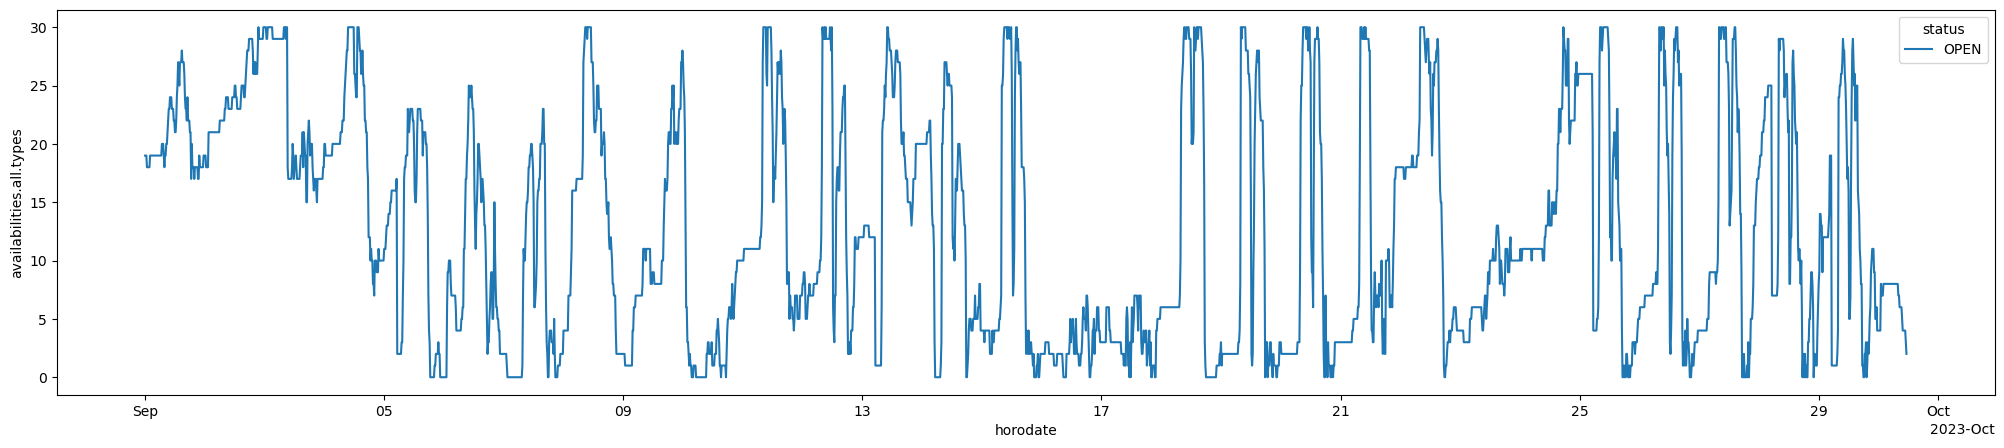

In [209]:
plt.figure(figsize=(25,5))
sns.lineplot(df[df["number"]==10001], x="horodate", y="availabilities.all.types", hue="status")
plt.show()

In [211]:
with open('dump2023_9_full.pkl', 'rb') as month_plk:
    df_full = pickle.load(month_plk)
    

In [212]:
df_full

,horodate,number,status,availabilities.all.types,availabilities.electricalBikes,availabilities.stands,capacity
0,2023-09-01 00:02:04+02:00,201,OPEN,1,0,0,5
1,2023-09-01 00:08:15+02:00,201,OPEN,1,0,0,5
2,2023-09-01 00:18:19+02:00,201,OPEN,1,0,0,5
3,2023-09-01 00:28:24+02:00,201,OPEN,1,0,0,5
4,2023-09-01 00:38:30+02:00,201,OPEN,1,0,0,5
...,...,...,...,...,...,...,...
3663982,2023-09-30 10:44:54+02:00,34002,OPEN,9,6,6,15
3663983,2023-09-30 10:53:34+02:00,34002,OPEN,9,6,6,15
3663984,2023-09-30 11:03:40+02:00,34002,OPEN,9,6,6,15
3663985,2023-09-30 11:13:45+02:00,34002,OPEN,9,6,6,15


In [222]:
df_full[df_full["status"]=="CLOSED"]

,horodate,number,status,availabilities.all.types,availabilities.electricalBikes,availabilities.stands,capacity
92113,2023-09-01 00:02:38+02:00,10010,CLOSED,0,0,0,16
92114,2023-09-01 00:12:43+02:00,10010,CLOSED,0,0,0,16
92115,2023-09-01 00:22:49+02:00,10010,CLOSED,0,0,0,16
92116,2023-09-01 00:32:54+02:00,10010,CLOSED,0,0,0,16
92117,2023-09-01 00:43:00+02:00,10010,CLOSED,0,0,0,16
...,...,...,...,...,...,...,...
3656528,2023-09-30 10:44:33+02:00,10010,CLOSED,0,0,0,16
3656529,2023-09-30 10:54:39+02:00,10010,CLOSED,0,0,0,16
3656530,2023-09-30 11:04:44+02:00,10010,CLOSED,0,0,0,16
3656531,2023-09-30 11:14:50+02:00,10010,CLOSED,0,0,0,16


In [231]:
#nombre de relevés par jour 
df["horodate"].dt.day.value_counts().sort_index()

1     41280
2     41280
3     41280
4     41227
5     41150
6     41070
7     41032
8     41088
9     40903
10    41074
11    41051
12    41055
13    41088
14    41088
15    41088
16    41088
17    41088
18    41124
19    41079
20    41195
21    41122
22    41060
23    40992
24    40992
25    40914
26    40472
27    40953
28    40968
29    40979
30    19794
Name: horodate, dtype: int64

In [233]:
df_full["horodate"] = pd.to_datetime(df_full["horodate"])

In [239]:
df_full[df_full["number"]==10001]["horodate"].dt.day.value_counts().sort_index()

1     250
2     210
3     242
4     252
5     262
6     276
7     248
8     250
9     222
10    236
11    324
12    311
13    259
14    298
15    321
16    220
17    252
18    247
19    304
20    312
21    307
22    295
23    203
24    246
25    310
26    333
27    300
28    351
29    342
30     68
Name: horodate, dtype: int64

<AxesSubplot:>

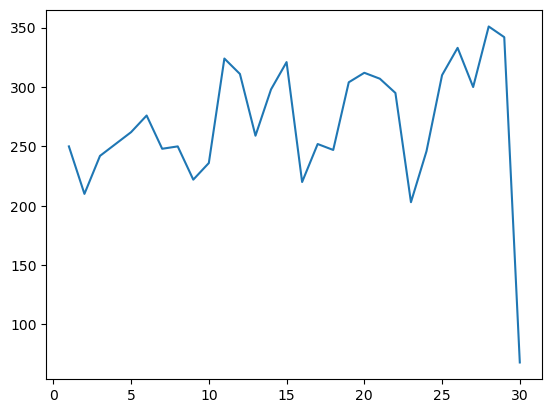

In [247]:
# df complet 
df_full[df_full["number"]==10001]["horodate"].dt.day.value_counts().sort_index().plot()
plt.show()

<AxesSubplot:>

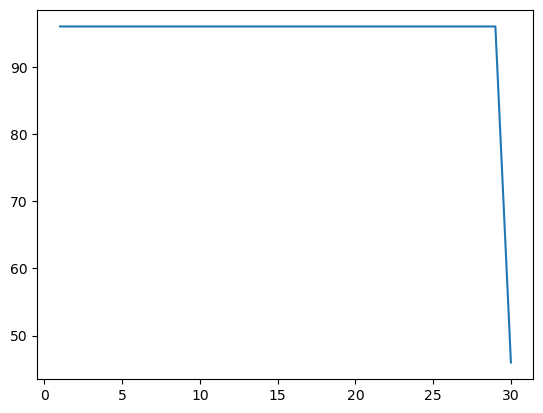

In [245]:
#df par 15 min 
df[df["number"]==10001]["availabilities.all.types"].dt.day.value_counts().sort_index().plot()
plt.show()

In [248]:
del df_full

In [251]:
df["horodate"].dt.weekday

0          4
1          4
2          4
3          4
4          4
          ..
1210569    5
1210570    5
1210571    5
1210572    5
1210573    5
Name: horodate, Length: 1210574, dtype: int64

In [252]:
df["day"]=df["horodate"].dt.weekday

In [270]:
# condition
condition = (df["day"]==5) | (df["day"]==6)

In [288]:
df.loc[(df["day"]==5) | (df["day"]==6), "weekend"]=1

In [289]:
df

,horodate,number,status,availabilities.all.types,availabilities.electricalBikes,availabilities.stands,capacity,day,weekend
0,2023-09-01 00:00:00+02:00,201,OPEN,1,0,0,5,4,0
1,2023-09-01 00:15:00+02:00,201,OPEN,1,0,0,5,4,0
2,2023-09-01 00:30:00+02:00,201,OPEN,1,0,0,5,4,0
3,2023-09-01 00:45:00+02:00,201,OPEN,1,0,0,5,4,0
4,2023-09-01 01:00:00+02:00,201,OPEN,1,0,0,5,4,0
...,...,...,...,...,...,...,...,...,...
1210569,2023-09-30 10:15:00+02:00,34002,OPEN,9,6,6,15,5,1
1210570,2023-09-30 10:30:00+02:00,34002,OPEN,9,6,6,15,5,1
1210571,2023-09-30 10:45:00+02:00,34002,OPEN,9,6,6,15,5,1
1210572,2023-09-30 11:00:00+02:00,34002,OPEN,9,6,6,15,5,1


In [307]:
with open('open-meteo-45.75N4.85E175m.csv', 'rb') as meteo:
    meteo = pd.read_csv(meteo, header=2)

In [308]:
meteo

,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),cloud_cover (%),wind_speed_200m (km/h),is_day ()
0,2023-09-01T00:00,20.5,55,0.0,29,3.9,0
1,2023-09-01T01:00,19.7,56,0.0,22,3.8,0
2,2023-09-01T02:00,19.7,56,0.0,32,4.7,0
3,2023-09-01T03:00,19.6,56,0.0,15,7.4,0
4,2023-09-01T04:00,19.0,59,0.0,11,6.8,0
...,...,...,...,...,...,...,...
2923,2023-12-31T19:00,8.0,83,0.0,100,12.0,0
2924,2023-12-31T20:00,7.7,83,0.0,83,8.0,0
2925,2023-12-31T21:00,6.3,87,0.0,53,11.2,0
2926,2023-12-31T22:00,5.6,82,0.0,0,16.1,0


In [309]:
meteo.time = pd.to_datetime(meteo.time)

In [310]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      2928 non-null   datetime64[ns]
 1   temperature_2m (°C)       2928 non-null   float64       
 2   relative_humidity_2m (%)  2928 non-null   int64         
 3   precipitation (mm)        2928 non-null   float64       
 4   cloud_cover (%)           2928 non-null   int64         
 5   wind_speed_200m (km/h)    2928 non-null   float64       
 6   is_day ()                 2928 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 160.2 KB


In [311]:
df.merge(meteo, how="left", left_on="horodate", right_on="time")

,horodate,number,status,availabilities.all.types,availabilities.electricalBikes,availabilities.stands,capacity,day,weekend,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),cloud_cover (%),wind_speed_200m (km/h),is_day ()
0,2023-09-01 00:00:00,201,OPEN,1,0,0,5,4,0,2023-09-01 00:00:00,20.5,55.0,0.0,29.0,3.9,0.0
1,2023-09-01 00:15:00,201,OPEN,1,0,0,5,4,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-09-01 00:30:00,201,OPEN,1,0,0,5,4,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-09-01 00:45:00,201,OPEN,1,0,0,5,4,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-09-01 01:00:00,201,OPEN,1,0,0,5,4,0,2023-09-01 01:00:00,19.7,56.0,0.0,22.0,3.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210569,2023-09-30 10:15:00,34002,OPEN,9,6,6,15,5,1,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1210570,2023-09-30 10:30:00,34002,OPEN,9,6,6,15,5,1,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1210571,2023-09-30 10:45:00,34002,OPEN,9,6,6,15,5,1,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1210572,2023-09-30 11:00:00,34002,OPEN,9,6,6,15,5,1,2023-09-30 11:00:00,23.4,47.0,0.0,100.0,13.2,1.0
